<a href="https://colab.research.google.com/github/jacobcperez15/multiclass-risk-classifier/blob/master/LIRiskClassBalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!git clone https://github.com/jacobcperez15/multiclass-risk-classifier.git

Cloning into 'multiclass-risk-classifier'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 46 (delta 19), reused 5 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 4.98 MiB | 3.40 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
#change directory to folder from github
%cd multiclass-risk-classifier

/content/multiclass-risk-classifier


In [ ]:
!ls

'Final Project Report (1).pdf'	 LIRiskClassJupyter.ipynb   test.csv
 LIRiskClassBalanced.ipynb	 README.md		    train.csv


In [ ]:
# import relevant libraries
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import warnings
warnings.simplefilter('ignore')

# Load the training data
data = pd.read_csv('train.csv')

# check if everything loaded properly
data.tail()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8
59380,79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
# get high level descriptive stats
data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [ ]:
# remove the training labels and id from the training data
training_data = data.drop(['Response','Id'], axis=1)
training_data.tail()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
59376,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,...,0,0,0,0,0,0,0,0,0,0
59377,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,...,0,0,0,0,0,0,0,0,0,0
59378,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,...,0,0,0,0,0,0,0,0,0,0
59379,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,...,0,1,0,0,0,0,0,0,0,0
59380,1,A8,26,0.076923,2,3,1,0.447761,0.781818,0.382845,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# use get dummies method to turn categorical data into numeric
product_info_2_dummies = pd.get_dummies(training_data['Product_Info_2'])
product_info_2_dummies.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
59376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
59377,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
59378,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
59379,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
59380,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# drop the original categorical column
training_data = training_data.drop(['Product_Info_2'], axis=1)
training_data.tail()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
59376,1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,...,0,0,0,0,0,0,0,0,0,0
59377,1,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,...,0,0,0,0,0,0,0,0,0,0
59378,1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,...,0,0,0,0,0,0,0,0,0,0
59379,1,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,...,0,1,0,0,0,0,0,0,0,0
59380,1,26,0.076923,2,3,1,0.447761,0.781818,0.382845,0.539563,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# add dummy df to training_data df
training_data = pd.concat([training_data, product_info_2_dummies], axis=1)
training_data.tail()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
59376,1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,0.519103,...,0,0,0,0,0,1,0,0,0,0
59377,1,26,0.230769,2,3,1,0.432836,0.800000,0.403766,0.551119,...,0,0,0,0,0,0,0,1,0,0
59378,1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,0.360969,...,0,0,0,0,0,0,0,0,0,1
59379,1,10,0.230769,2,3,1,0.507463,0.690909,0.276151,0.462452,...,0,0,0,0,0,0,1,0,0,0
59380,1,26,0.076923,2,3,1,0.447761,0.781818,0.382845,0.539563,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create a variable for the response classes / labels
response = data['Response']
response.tail()

59376    4
59377    7
59378    8
59379    8
59380    7
Name: Response, dtype: int64

In [ ]:
#check for data imbalances
classes_count = response.value_counts()
classes_count

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

In [ ]:
with pd.option_context('display.max_rows', None):
    print(training_data.dtypes)

Product_Info_1           int64
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
Insurance_History_8      int64
Insurance_History_9      int64
Family_Hist_1            int64
Family_H

In [ ]:
# identify which columns should be dropped due to over 30% missing data
percent_missing = training_data.isnull().sum()/len(training_data)*100
print(percent_missing[percent_missing > 0.3].sort_values(ascending=False))

Medical_History_10     99.061990
Medical_History_32     98.135767
Medical_History_24     93.598963
Medical_History_15     75.101463
Family_Hist_5          70.411411
Family_Hist_3          57.663226
Family_Hist_2          48.257860
Insurance_History_5    42.767889
Family_Hist_4          32.306630
Employment_Info_6      18.278574
Medical_History_1      14.969435
Employment_Info_4      11.416110
dtype: float64


In [ ]:
# using imputed_data, create a train/test split to evaluate how well a trained model performs on unseen data
train_data, test_data, train_labels, test_labels = train_test_split(training_data, response, test_size=0.20, random_state=0)

# transform the training data via standardization
scaler = StandardScaler()
scaler.fit(train_data)

train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
from multiprocessing import Pipe
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler

#shap does not support pipelines
balanced_bagging = BalancedBaggingClassifier(estimator=HistGradientBoostingClassifier(random_state=0,
                                                                                      ),
                                             n_estimators=10, #default 10, 100 takes too long
                                             sampler=RandomUnderSampler(), #this is the default
                                             sampling_strategy='all', #experimented with majority, lost to brf
                                             replacement=True,
                                             random_state=0,
                                             n_jobs=-1)

In [ ]:
bb_pipe = Pipeline([('si',SimpleImputer(missing_values=np.nan, strategy='mean')),
                    ('sc',StandardScaler()),
                    ('clf',balanced_bagging)])

bb_pipe.fit(train_data, train_labels)

y_pred_bbc = bb_pipe.predict(test_data)

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

print("Balanced Bagging classifier performance w/HistGradientBoosting imputation:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(test_labels, y_pred_bbc):.2f} - "
    f"Geometric mean {geometric_mean_score(test_labels, y_pred_bbc):.2f} - "
    f"Accuracy {accuracy_score(test_labels, y_pred_bbc):.2f}")

Balanced Bagging classifier performance w/HistGradientBoosting imputation:
Balanced accuracy: 0.53 - Geometric mean 0.49 - Accuracy 0.56


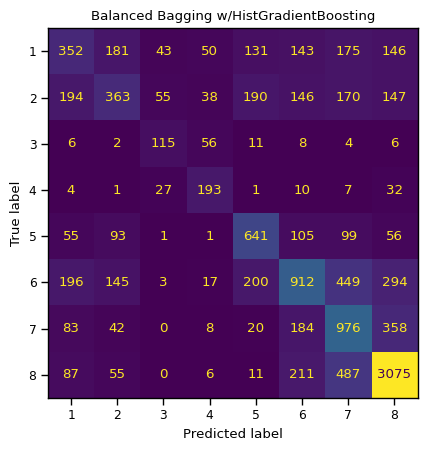

In [ ]:
sns.set_context("paper")
disp = ConfusionMatrixDisplay.from_estimator(bb_pipe, test_data, test_labels, colorbar=False)
_ = disp.ax_.set_title("Balanced Bagging w/HistGradientBoosting")

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

balanced_forest = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True,
                                                 class_weight='balanced',
                                                 random_state=0, n_jobs=-1)

bf_pipe = Pipeline([('si',SimpleImputer(missing_values=np.nan, strategy='mean')),
                   ('ss',StandardScaler()),
                  ( 'clf',balanced_forest)])

bf_pipe.fit(train_data, train_labels)

y_pred_brf = bf_pipe.predict(test_data)

In [ ]:
print("Balanced Random Forest classifier performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(test_labels, y_pred_brf):.2f} - "
    f"Geometric mean {geometric_mean_score(test_labels, y_pred_brf):.2f} - "
    f"Accuracy {accuracy_score(test_labels, y_pred_bbc):.2f}")

Balanced Random Forest classifier performance:
Balanced accuracy: 0.48 - Geometric mean 0.42 - Accuracy 0.56


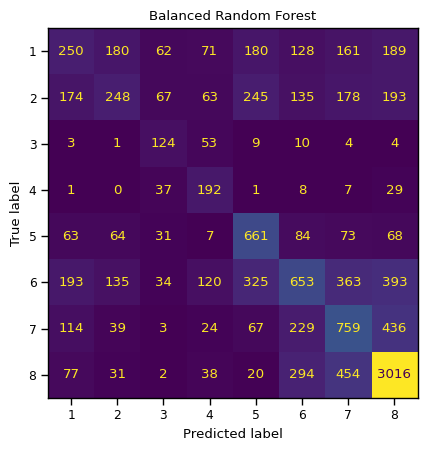

In [ ]:
sns.set_context("paper")
disp = ConfusionMatrixDisplay.from_estimator(bf_pipe, test_data, test_labels, colorbar=False)
_ = disp.ax_.set_title("Balanced Random Forest")

In [ ]:
from sklearn.feature_selection import RFECV

rfecv_88 = RFECV(
    estimator=balanced_forest,
    step=1,
    #cv=cv,
    scoring="balanced_accuracy",
    min_features_to_select=88,
    n_jobs=-1,
)

pipe3 = Pipeline([('si',SimpleImputer(missing_values=np.nan, strategy='mean')),
                   ('ss',StandardScaler()),
                   ('rfe',rfecv_88),
                   ('clf',balanced_forest)])

pipe3.fit(train_data, train_labels)

y_pred_pipe3 = pipe3.predict(test_data)

In [ ]:
y_pred_pipe3 = pipe3.predict(test_data)

In [ ]:
print("Balanced Random Forest classifier w/RFECV performance:")
print(
    f"Balanced accuracy: {balanced_accuracy_score(test_labels, y_pred_pipe3):.2f} - "
    f"Geometric mean {geometric_mean_score(test_labels, y_pred_pipe3):.2f} - "
    f"Accuracy {accuracy_score(test_labels, y_pred_pipe3):.2f}")

Balanced Random Forest classifier w/RFECV performance:
Balanced accuracy: 0.48 - Geometric mean 0.43 - Accuracy 0.50
